In [ ]:
from transformers import AutoTokenizer

# Load tokenizers
t5_tok = AutoTokenizer.from_pretrained("google/flan-t5-base")
bloom_tok = AutoTokenizer.from_pretrained("bigscience/bloom-560m")

sentences = [
    "کٲشِرۍ پشمینہ شالن ہٕنز عالمی منگ چھِ بڑان، تِکیازِ فیشن شوقیٖن چھِ یِہندِ بے مثال معیار تہٕ لازوال خوبصوٗرتی ہٕنز تعریٖف کران",
    "کٲشِرِ پشمینہ شالن ہُند بڑوُن عالمی بازار چھُ یِمَن شاندار کپُرَن ہٕنز لازوال اپیل تہٕ پایدار مقبولیت اجاگر کران"
]

def test_reconstruction(tok, name):
    print(f"\n== {name} ==")
    for s in sentences:
        enc = tok.encode(s, return_tensors=None)
        dec = tok.decode(enc, skip_special_tokens=True)
        print("Original:   ", s)
        print("Reconstructed:", dec)
        print("Match:", s == dec)
        print("-" * 50)

test_reconstruction(t5_tok, "Flan-T5 (SentencePiece)")
test_reconstruction(bloom_tok, "BLOOM (Byte-level BPE)")


tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]


== Flan-T5 (SentencePiece) ==
Original:    کٲشِرۍ پشمینہ شالن ہٕنز عالمی منگ چھِ بڑان، تِکیازِ فیشن شوقیٖن چھِ یِہندِ بے مثال معیار تہٕ لازوال خوبصوٗرتی ہٕنز تعریٖف کران
Reconstructed:                      
Match: False
--------------------------------------------------
Original:    کٲشِرِ پشمینہ شالن ہُند بڑوُن عالمی بازار چھُ یِمَن شاندار کپُرَن ہٕنز لازوال اپیل تہٕ پایدار مقبولیت اجاگر کران
Reconstructed:                   
Match: False
--------------------------------------------------

== BLOOM (Byte-level BPE) ==
Original:    کٲشِرۍ پشمینہ شالن ہٕنز عالمی منگ چھِ بڑان، تِکیازِ فیشن شوقیٖن چھِ یِہندِ بے مثال معیار تہٕ لازوال خوبصوٗرتی ہٕنز تعریٖف کران
Reconstructed: کٲشِرۍ پشمینہ شالن ہٕنز عالمی منگ چھِ بڑان، تِکیازِ فیشن شوقیٖن چھِ یِہندِ بے مثال معیار تہٕ لازوال خوبصوٗرتی ہٕنز تعریٖف کران
Match: True
--------------------------------------------------
Original:    کٲشِرِ پشمینہ شالن ہُند بڑوُن عالمی بازار چھُ یِمَن شاندار کپُرَن ہٕنز لازوال اپیل تہٕ پایدار مقبولیت اجاگر کران
Rec

In [ ]:
!pip install transformers accelerate datasets scikit-learn --quiet

In [ ]:
from transformers import AutoTokenizer

# Load tokenizers
t5_tok = AutoTokenizer.from_pretrained("google/flan-t5-base", use_fast=False)
bloom_tok = AutoTokenizer.from_pretrained("bigscience/bloom-560m", use_fast=True)

# Pick some sentences from your dataset
sentences = [
    "کٲشِرۍ پشمینہ شالن ہٕنز عالمی منگ چھِ بڑان، تِکیازِ فیشن شوقیٖن چھِ یِہندِ بے مثال معیار تہٕ لازوال خوبصوٗرتی ہٕنز تعریٖف کران",
    "کٲشِرِ پشمینہ شالن ہُند بڑوُن عالمی بازار چھُ یِمَن شاندار کپُرَن ہٕنز لازوال اپیل تہٕ پایدار مقبولیت اجاگر کران"
]

# Function to check round-trip
def check_roundtrip(tok, name):
    print(f"\n== {name} ==")
    for s in sentences:
        encoded = tok.encode(s, add_special_tokens=False)
        decoded = tok.decode(encoded, clean_up_tokenization_spaces=False)
        print("Original:    ", s)
        print("Reconstructed:", decoded)
        print("Match:", s == decoded)
        print("-" * 50)

check_roundtrip(t5_tok, "Flan-T5 (SentencePiece)")
check_roundtrip(bloom_tok, "BLOOM (Byte-level BPE)")



== Flan-T5 (SentencePiece) ==
Original:     کٲشِرۍ پشمینہ شالن ہٕنز عالمی منگ چھِ بڑان، تِکیازِ فیشن شوقیٖن چھِ یِہندِ بے مثال معیار تہٕ لازوال خوبصوٗرتی ہٕنز تعریٖف کران
Reconstructed: <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
Match: False
--------------------------------------------------
Original:     کٲشِرِ پشمینہ شالن ہُند بڑوُن عالمی بازار چھُ یِمَن شاندار کپُرَن ہٕنز لازوال اپیل تہٕ پایدار مقبولیت اجاگر کران
Reconstructed: <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
Match: False
--------------------------------------------------

== BLOOM (Byte-level BPE) ==
Original:     کٲشِرۍ پشمینہ شالن ہٕنز عالمی منگ چھِ بڑان، تِکیازِ فیشن شوقیٖن چھِ یِہندِ بے مثال معیار تہٕ لازوال خوبصوٗرتی ہٕنز تعریٖف کران
Reconstructed: کٲشِرۍ پشمینہ شالن ہٕنز عالمی منگ چھِ بڑان، تِکیازِ فیشن شوقیٖن چھِ یِہندِ بے مثال معیار تہٕ لازوال خوبصوٗرتی ہ


== Flan-T5 (SentencePiece) ==
Original:     کٲشِرۍ پشمینہ شال، یِم پننہِ عالیشان نرمی تہٕ پیچیدٕ ڈیزائنو خٲطرٕ زاننہٕ چھِ یِوان، چھِ پننہِ شاندار دستکٲری باپتھ بین الاقوٲمی شہرت حٲصِل کٔرمٕژ۔
Tokens:       ['▁', 'کٲشِرۍ', '▁', 'پشمینہ', '▁', 'شال،', '▁', 'یِم', '▁', 'پننہِ', '▁', 'عالیشان', '▁', 'نرمی', '▁', 'تہٕ', '▁', 'پیچیدٕ', '▁', 'ڈیزائنو', '▁', 'خٲطرٕ', '▁', 'زاننہٕ', '▁', 'چھِ', '▁', 'یِوان،', '▁', 'چھِ', '▁', 'پننہِ', '▁', 'شاندار', '▁', 'دستکٲری', '▁', 'باپتھ', '▁', 'بین', '▁', 'الاقوٲمی', '▁', 'شہرت', '▁', 'حٲصِل', '▁', 'کٔرمٕژ۔']
Tokens/Word:  2.0
UNK tokens:   0
Reconstructed: <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>
Match: False
--------------------------------------------------
Original:     کٔشیٖرِ منٛز کٲرِگَر چھِ احتیاط سان اتھہٕ سۭتہِ کَران تہٕ پشمینہ شال وَنان، ییٚمہِ سۭتہِ صدیو پرٛٲنہِ رٮ۪وایت محفوظ روزان چھے٘ یۄسہٕ وُنہِ تہِ ترقی کران چھے٘ ۔
Tokens:       ['▁', '

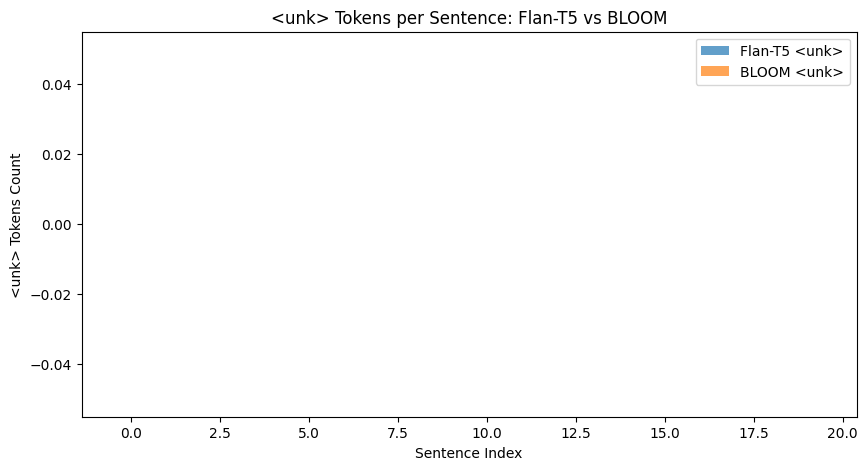


Summary:
Flan-T5: avg <unk> per sentence = 0.00, round-trip match = 0/20
BLOOM:   avg <unk> per sentence = 0.00, round-trip match = 20/20


In [ ]:
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt


file_path = "/content/Dataset15k_cleaned1.xlsx"
df = pd.read_excel(file_path)
df = df.dropna(subset=["Kashmiri"])
sentences = df["Kashmiri"].astype(str).tolist()[:20]  # first 20 sentences for quick demo

t5_tok = AutoTokenizer.from_pretrained("google/flan-t5-base", use_fast=False)
bloom_tok = AutoTokenizer.from_pretrained("bigscience/bloom-560m", use_fast=True)

def analyze_tokenizer(tok, name, sentences):
    print(f"\n== {name} ==")
    unk_counts = []
    recon_matches = []
    avg_tokens_per_word_list = []

    for s in sentences:
        tokens = tok.tokenize(s)
        # Count <unk> tokens
        unk_count = tokens.count(tok.unk_token)
        unk_counts.append(unk_count)
        # Tokens per word
        tokens_per_word = len(tokens) / max(1, len(s.split()))
        avg_tokens_per_word_list.append(tokens_per_word)
        # Reconstruction
        try:
            encoded = tok.encode(s, add_special_tokens=False)
            decoded = tok.decode(encoded, clean_up_tokenization_spaces=False)
            recon_matches.append(decoded == s)
        except:
            decoded = "<decode failed>"
            recon_matches.append(False)

        print("Original:    ", s)
        print("Tokens:      ", tokens)
        print("Tokens/Word: ", round(tokens_per_word, 2))
        print("UNK tokens:  ", unk_count)
        print("Reconstructed:", decoded)
        print("Match:", decoded == s)
        print("-" * 50)

    return unk_counts, avg_tokens_per_word_list, recon_matches


unk_t5, avg_t5, recon_t5 = analyze_tokenizer(t5_tok, "Flan-T5 (SentencePiece)", sentences)
unk_bl, avg_bl, recon_bl = analyze_tokenizer(bloom_tok, "BLOOM (Byte-level BPE)", sentences)

plt.figure(figsize=(10,5))
plt.bar(range(len(sentences)), unk_t5, alpha=0.7, label='Flan-T5 <unk>')
plt.bar(range(len(sentences)), unk_bl, alpha=0.7, label='BLOOM <unk>')
plt.xlabel("Sentence Index")
plt.ylabel("<unk> Tokens Count")
plt.title("<unk> Tokens per Sentence: Flan-T5 vs BLOOM")
plt.legend()
plt.show()


print("\nSummary:")
print(f"Flan-T5: avg <unk> per sentence = {sum(unk_t5)/len(unk_t5):.2f}, round-trip match = {sum(recon_t5)}/{len(recon_t5)}")
print(f"BLOOM:   avg <unk> per sentence = {sum(unk_bl)/len(unk_bl):.2f}, round-trip match = {sum(recon_bl)}/{len(recon_bl)}")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]


== Flan-T5 (SentencePiece) ==
Original:     भारत एक महान देश है।
Tokens:       ['▁', 'भारत', '▁', 'एक', '▁', 'महान', '▁', 'देश', '▁', 'है।']
Tokens/Word:  2.0
UNK tokens:   0
Reconstructed: <unk> <unk> <unk> <unk> <unk>
Match: False
--------------------------------------------------
Original:     मौसम आज बहुत सुहावना है।
Tokens:       ['▁', 'मौसम', '▁', 'आज', '▁', 'बहुत', '▁', 'सुहावना', '▁', 'है।']
Tokens/Word:  2.0
UNK tokens:   0
Reconstructed: <unk> <unk> <unk> <unk> <unk>
Match: False
--------------------------------------------------
Original:     मैंने कल नया किताब खरीदा।
Tokens:       ['▁', 'मैंने', '▁', 'कल', '▁', 'नया', '▁', 'किताब', '▁', 'खरीदा।']
Tokens/Word:  2.0
UNK tokens:   0
Reconstructed: <unk> <unk> <unk> <unk> <unk>
Match: False
--------------------------------------------------
Original:     स्कूल में बच्चों ने खेलकूद का आयोजन किया।
Tokens:       ['▁', 'स्कूल', '▁', 'में', '▁', 'बच्चों', '▁', 'ने', '▁', 'खेलकूद', '▁', 'का', '▁', 'आयोजन', '▁', 'किया।']
Tokens/Word:

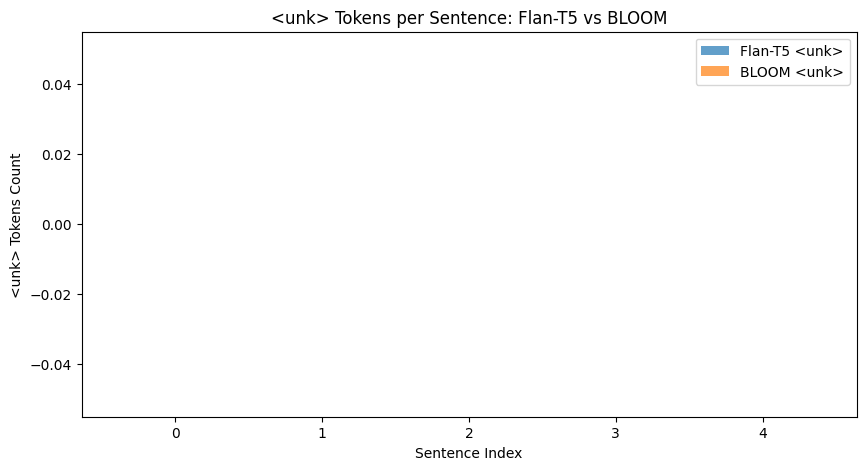


Summary:
Flan-T5: avg <unk> per sentence = 0.00, round-trip match = 0/5
BLOOM:   avg <unk> per sentence = 0.00, round-trip match = 5/5


In [ ]:
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt


sentences = [
    "भारत एक महान देश है।",
    "मौसम आज बहुत सुहावना है।",
    "मैंने कल नया किताब खरीदा।",
    "स्कूल में बच्चों ने खेलकूद का आयोजन किया।",
    "खाना बहुत स्वादिष्ट था।"
]
t5_tok = AutoTokenizer.from_pretrained("google/flan-t5-base", use_fast=False)
bloom_tok = AutoTokenizer.from_pretrained("bigscience/bloom-560m", use_fast=True)


def analyze_tokenizer(tok, name, sentences):
    print(f"\n== {name} ==")
    unk_counts = []
    recon_matches = []
    avg_tokens_per_word_list = []

    for s in sentences:
        tokens = tok.tokenize(s)
        # Count <unk> tokens
        unk_count = tokens.count(tok.unk_token)
        unk_counts.append(unk_count)
        # Tokens per word
        tokens_per_word = len(tokens) / max(1, len(s.split()))
        avg_tokens_per_word_list.append(tokens_per_word)
        # Reconstruction
        try:
            encoded = tok.encode(s, add_special_tokens=False)
            decoded = tok.decode(encoded, clean_up_tokenization_spaces=False)
            recon_matches.append(decoded == s)
        except:
            decoded = "<decode failed>"
            recon_matches.append(False)

        print("Original:    ", s)
        print("Tokens:      ", tokens)
        print("Tokens/Word: ", round(tokens_per_word, 2))
        print("UNK tokens:  ", unk_count)
        print("Reconstructed:", decoded)
        print("Match:", decoded == s)
        print("-" * 50)

    return unk_counts, avg_tokens_per_word_list, recon_matches


unk_t5, avg_t5, recon_t5 = analyze_tokenizer(t5_tok, "Flan-T5 (SentencePiece)", sentences)
unk_bl, avg_bl, recon_bl = analyze_tokenizer(bloom_tok, "BLOOM (Byte-level BPE)", sentences)

plt.figure(figsize=(10,5))
plt.bar(range(len(sentences)), unk_t5, alpha=0.7, label='Flan-T5 <unk>')
plt.bar(range(len(sentences)), unk_bl, alpha=0.7, label='BLOOM <unk>')
plt.xlabel("Sentence Index")
plt.ylabel("<unk> Tokens Count")
plt.title("<unk> Tokens per Sentence: Flan-T5 vs BLOOM")
plt.legend()
plt.show()


print("\nSummary:")
print(f"Flan-T5: avg <unk> per sentence = {sum(unk_t5)/len(unk_t5):.2f}, round-trip match = {sum(recon_t5)}/{len(recon_t5)}")
print(f"BLOOM:   avg <unk> per sentence = {sum(unk_bl)/len(unk_bl):.2f}, round-trip match = {sum(recon_bl)}/{len(recon_bl)}")



== Flan-T5 (SentencePiece) ==
Original:     Le soleil brille dans le ciel ce matin.
Tokens:       ['▁Le', '▁soleil', '▁', 'bri', 'll', 'e', '▁dans', '▁le', '▁ciel', '▁ce', '▁matin', '.']
Tokens/Word:  1.5
UNK tokens:   0
Reconstructed: Le soleil brille dans le ciel ce matin.
Match: True
--------------------------------------------------
Original:     J'aime lire des livres avant de dormir.
Tokens:       ['▁J', "'", 'aime', '▁lire', '▁des', '▁livres', '▁avant', '▁de', '▁do', 'r', 'mir', '.']
Tokens/Word:  1.71
UNK tokens:   0
Reconstructed: J'aime lire des livres avant de dormir.
Match: True
--------------------------------------------------
Original:     Les enfants jouent dans le parc avec leurs amis.
Tokens:       ['▁Les', '▁enfants', '▁', 'jou', 'ent', '▁dans', '▁le', '▁parc', '▁avec', '▁', 'leurs', '▁amis', '.']
Tokens/Word:  1.44
UNK tokens:   0
Reconstructed: Les enfants jouent dans le parc avec leurs amis.
Match: True
--------------------------------------------------
Original:

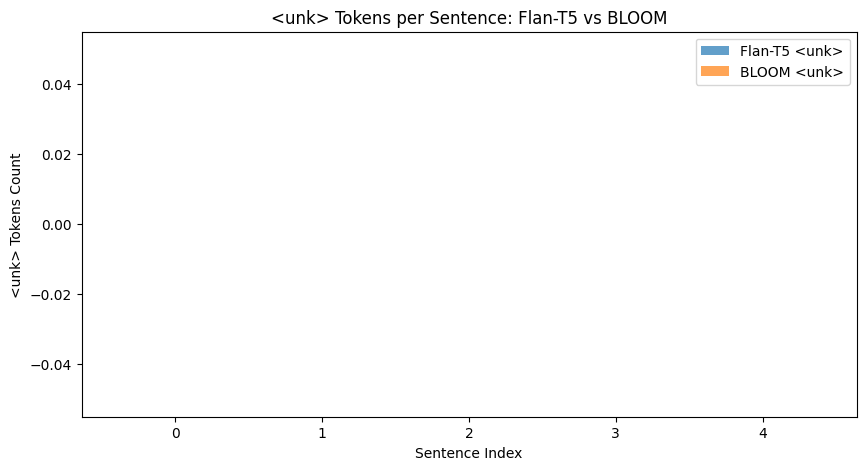


Summary:
Flan-T5: avg <unk> per sentence = 0.00, round-trip match = 5/5
BLOOM:   avg <unk> per sentence = 0.00, round-trip match = 5/5


In [ ]:
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt


sentences = [
    "Le soleil brille dans le ciel ce matin.",
    "J'aime lire des livres avant de dormir.",
    "Les enfants jouent dans le parc avec leurs amis.",
    "Elle prépare un gâteau au chocolat pour l'anniversaire.",
    "Le train partira à l'heure prévue malgré la pluie."
]


t5_tok = AutoTokenizer.from_pretrained("google/flan-t5-base", use_fast=False)
bloom_tok = AutoTokenizer.from_pretrained("bigscience/bloom-560m", use_fast=True)


def analyze_tokenizer(tok, name, sentences):
    print(f"\n== {name} ==")
    unk_counts = []
    recon_matches = []
    avg_tokens_per_word_list = []

    for s in sentences:
        tokens = tok.tokenize(s)
        # Count <unk> tokens
        unk_count = tokens.count(tok.unk_token)
        unk_counts.append(unk_count)
        # Tokens per word
        tokens_per_word = len(tokens) / max(1, len(s.split()))
        avg_tokens_per_word_list.append(tokens_per_word)
        # Reconstruction
        try:
            encoded = tok.encode(s, add_special_tokens=False)
            decoded = tok.decode(encoded, clean_up_tokenization_spaces=False)
            recon_matches.append(decoded == s)
        except:
            decoded = "<decode failed>"
            recon_matches.append(False)

        print("Original:    ", s)
        print("Tokens:      ", tokens)
        print("Tokens/Word: ", round(tokens_per_word, 2))
        print("UNK tokens:  ", unk_count)
        print("Reconstructed:", decoded)
        print("Match:", decoded == s)
        print("-" * 50)

    return unk_counts, avg_tokens_per_word_list, recon_matches

unk_t5, avg_t5, recon_t5 = analyze_tokenizer(t5_tok, "Flan-T5 (SentencePiece)", sentences)
unk_bl, avg_bl, recon_bl = analyze_tokenizer(bloom_tok, "BLOOM (Byte-level BPE)", sentences)


plt.figure(figsize=(10,5))
plt.bar(range(len(sentences)), unk_t5, alpha=0.7, label='Flan-T5 <unk>')
plt.bar(range(len(sentences)), unk_bl, alpha=0.7, label='BLOOM <unk>')
plt.xlabel("Sentence Index")
plt.ylabel("<unk> Tokens Count")
plt.title("<unk> Tokens per Sentence: Flan-T5 vs BLOOM")
plt.legend()
plt.show()

print("\nSummary:")
print(f"Flan-T5: avg <unk> per sentence = {sum(unk_t5)/len(unk_t5):.2f}, round-trip match = {sum(recon_t5)}/{len(recon_t5)}")
print(f"BLOOM:   avg <unk> per sentence = {sum(unk_bl)/len(unk_bl):.2f}, round-trip match = {sum(recon_bl)}/{len(recon_bl)}")
